# Test reading and plotting coefficients with pyEXP

We begin by importing `pyEXP` and friends and setting the working directory.

In [1]:
import os
import yaml
import pyEXP
import numpy as np
import matplotlib.pyplot as plt

# In this test, I assume that sample.py has already been run to
# generate a coefficient set.  This script points at that directory
# and does some additional analysis and plotting
#
os.chdir('/data/Nbody/FlatDisk')

## Reading the disk coefficients
We created the halo coefficients in the last notebook and stashed them in the EXP HDF5 format.  Now, we'll read them back.

In [2]:
# Reread the coefs from the file
#
coefs = pyEXP.coefs.Coefs.factory('outcoef.disk.run0.h5')

print("Got coefs for name=", coefs.getName())

Got coefs for name= disk


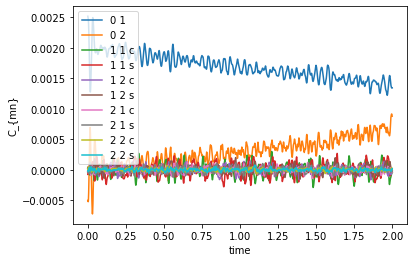

In [3]:
times = coefs.Times()
data  = coefs.getAllCoefs()

for m in range(3):
    for n in range(1,3):
        if m==0:
            plt.plot(times, np.real(data[m, n, :]), label='{} {}'.format(m, n))
        else:
            plt.plot(times, np.real(data[m, n, :]), label='{} {} c'.format(m, n))
            plt.plot(times, np.imag(data[m, n, :]), label='{} {} s'.format(m, n))
plt.xlabel('time')
plt.ylabel('C_{mn}')
plt.legend()
plt.show()

## Repeat with the 'better' example


In [6]:
os.chdir('/home/weinberg/Nbody/Better')
coefs_star = pyEXP.coefs.Coefs.factory('outcoef.star.run2.h5')
coefs_dark = pyEXP.coefs.Coefs.factory('outcoef.dark.run2.h5')

print("Got coefs for name=", coefs_star.getName(), ",", coefs_dark.getName())

Got coefs for name= star disk ,  dark halo


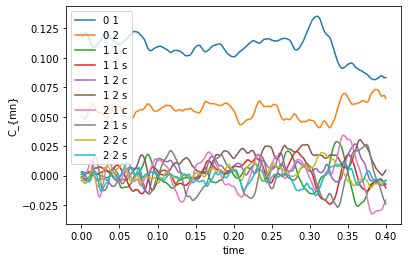

In [7]:
times = coefs_star.Times()
data  = coefs_star.getAllCoefs()

for m in range(3):
    for n in range(1,3):
        if m==0:
            plt.plot(times, np.real(data[m, n, :]), label='{} {}'.format(m, n))
        else:
            plt.plot(times, np.real(data[m, n, :]), label='{} {} c'.format(m, n))
            plt.plot(times, np.imag(data[m, n, :]), label='{} {} s'.format(m, n))
plt.xlabel('time')
plt.ylabel('C_{mn}')
plt.legend()
plt.show()

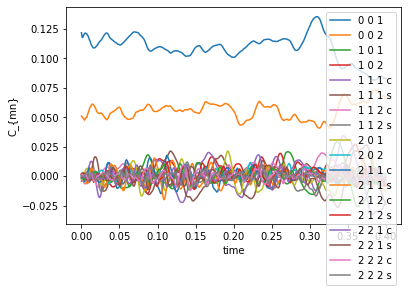

In [9]:
times = coefs_star.Times()
data  = coefs_star.getAllCoefs()

def I(l, m):
    return int(l*(l+1)/2) + m

for l in range(3):
    for m in range(l+1):
        for n in range(1,3):
            if m==0:
                plt.plot(times, np.real(data[I(l, m), n, :]), label='{} {} {}'.format(l, m, n))
            else:
                plt.plot(times, np.real(data[I(l, m), n, :]), label='{} {} {} c'.format(l, m, n))
                plt.plot(times, np.imag(data[I(l, m), n, :]), label='{} {} {} s'.format(l, m, n))
plt.xlabel('time')
plt.ylabel('C_{mn}')
plt.legend()
plt.show()